In [120]:
## 9.3 Różnice funkcjonalne pomiędzy sieciami jedno- i wielowarstwowymi

In [104]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from NN_helpers import draw_nn
from NN_helpers import draw_response3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X = [[0,0],[0,1],[1,0],[1,1]]
y = [0, 0, 0, 1]

def draw_response3D(mlp,X,y, name):
    h = .02  # step size in the mesh
    X=np.array(X) #only needed if someone provided a list of lists as X
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(xx, yy, Z, cmap='coolwarm', linewidth=0, antialiased=True)
    #TODO overlay Axes3D.scatter X and color by y, as in draw_response()? https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
    plt.show()
    fig.savefig('plots/response_' + name + '.pdf', bbox_inches="tight")
    
def drawLoss(_clf, name):
    f = plt.figure()
    plt.plot(_clf.loss_curve_, label="Funkcja straty")
    plt.xlabel("Epoka")
    plt.ylabel("Strata")
    plt.legend()
    plt.show()
    f.savefig('plots/loss_' + name + '.pdf', bbox_inches="tight")
    
def printResults(_clf, name):
    print(clf.predict(X))
    print(clf.predict_proba(X))
    
    draw_response3D(clf,X,y, name)
    
    drawLoss(_clf, name)
    

[0 0 0 1]
1.0
[0 0 0 1]
[[0.90465101 0.09534899]
 [0.69197876 0.30802124]
 [0.76178156 0.23821844]
 [0.43090809 0.56909191]]


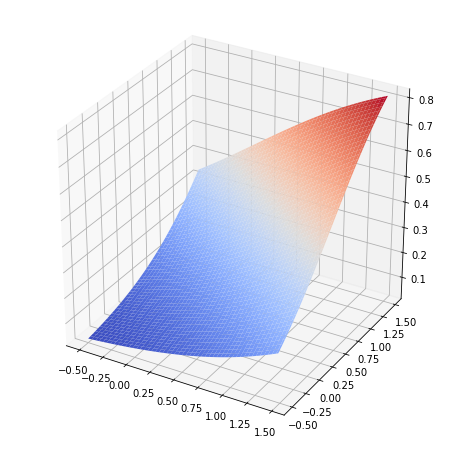

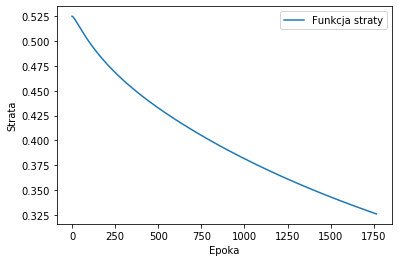

In [111]:
y = [0, 0, 0, 1]
clf = MLPClassifier(activation='identity', solver='sgd', alpha=1e-5, hidden_layer_sizes=(), random_state=1, 
                    max_iter=10000, n_iter_no_change=1000)
# clf = MLPClassifier( activation='identity', hidden_layer_sizes=(), random_state=1, max_iter=1, warm_start=True)
# licz=[] #gromadzimy na potrzeby wykresu te trzy parametry
# accu=[]
# loss=[]
# for i in range(2000):
#     clf.fit(X, y)
#     licz.append(i)
#     accu.append(clf.score(X,y))
#     loss.append(clf.loss_)
#     if i%50==0: #wyświetlaj postęp obliczeń, co 50-ta epoka
#         print("iter",i,"\taccuracy",clf.score(X,y),"\tloss",clf.loss_)
# import matplotlib.pyplot as plt
# plt.plot(licz,accu,loss)
#draw_nn(clf)

# print(clf.predict(X))
# print(y)

clf.fit(X, y)

print(clf.predict(X))

print(clf.score(X,y))

printResults(clf, "and_1_identity")

[0 0 0 1]
[[9.99999732e-01 2.67770530e-07]
 [9.94004738e-01 5.99526172e-03]
 [9.94325148e-01 5.67485187e-03]
 [7.71883654e-03 9.92281163e-01]]


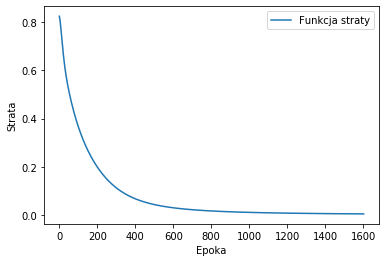

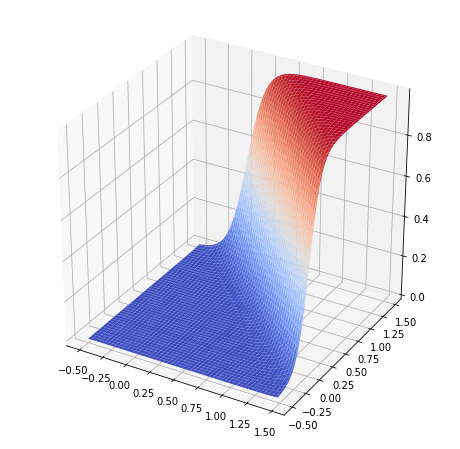

In [161]:
clf = MLPClassifier(activation='identity', hidden_layer_sizes=(4, 4, 4), solver='sgd', alpha=1e-5, random_state=1, 
                    max_iter=10000, n_iter_no_change=1000)
clf.fit(X, y)

printResults(clf, "and_2_identity")

[0 0 0 1]
[[0.8995718  0.1004282 ]
 [0.70755871 0.29244129]
 [0.74103843 0.25896157]
 [0.43596697 0.56403303]]


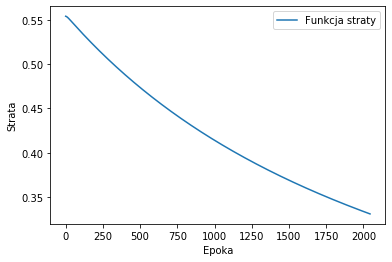

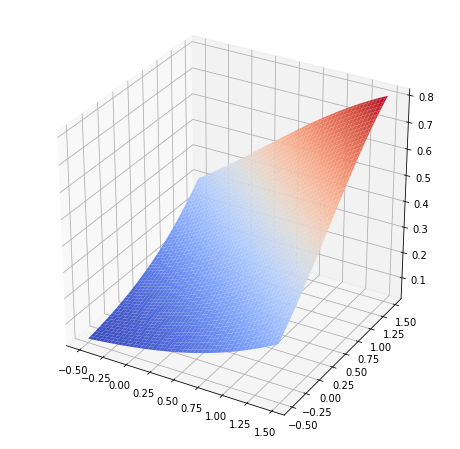

In [162]:
clf = MLPClassifier(activation='logistic', hidden_layer_sizes=(), solver='sgd', alpha=1e-5, random_state=1, 
                    max_iter=10000, n_iter_no_change=1000)
clf.fit(X, y)

printResults(clf, "and_1_logistic")


[0 1 0 1]
[[0.60688449 0.39311551]
 [0.47099988 0.52900012]
 [0.5653595  0.4346405 ]
 [0.42863481 0.57136519]]


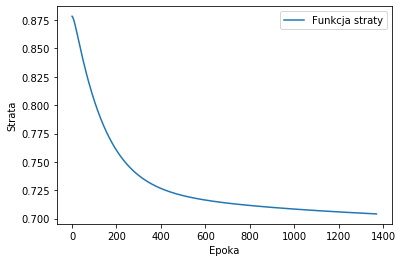

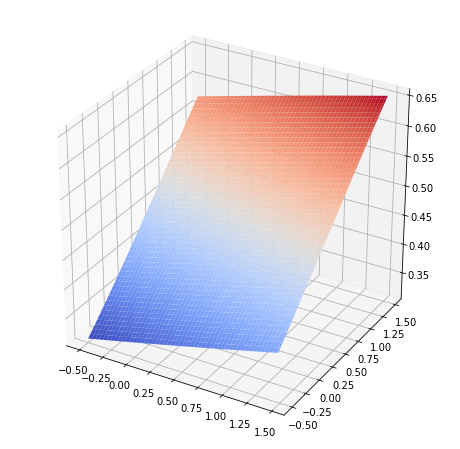

In [163]:
# XOR
y = [0, 1, 1, 0]

clf = MLPClassifier(activation='identity', hidden_layer_sizes=(), solver='sgd', alpha=1e-5, random_state=1, 
                    max_iter=10000, n_iter_no_change=1000)
clf.fit(X, y)

printResults(clf, "xor_1_identity")

[0 1 0 1]
[[0.5657227  0.4342773 ]
 [0.48194779 0.51805221]
 [0.54101402 0.45898598]
 [0.45704727 0.54295273]]


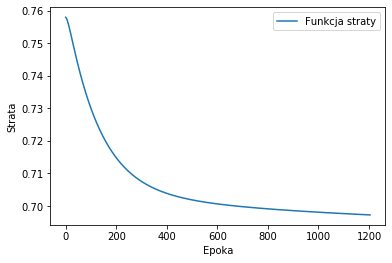

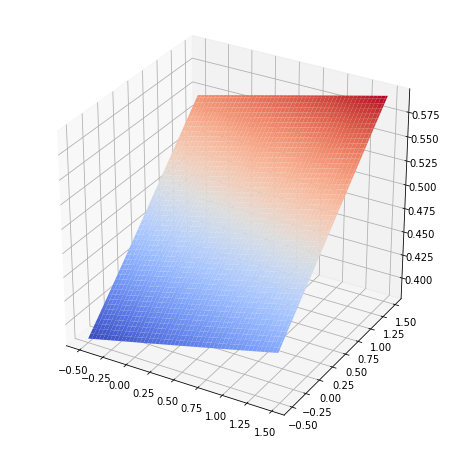

In [164]:
clf = MLPClassifier(activation='logistic', hidden_layer_sizes=(), solver='sgd', alpha=1e-5, random_state=1, 
                    max_iter=10000, n_iter_no_change=1000)
clf.fit(X, y)

printResults(clf, "xor_1_logistic")

[0 0 0 0]
[[0.80492632 0.19507368]
 [0.76345133 0.23654867]
 [0.75620021 0.24379979]
 [0.71544438 0.28455562]]


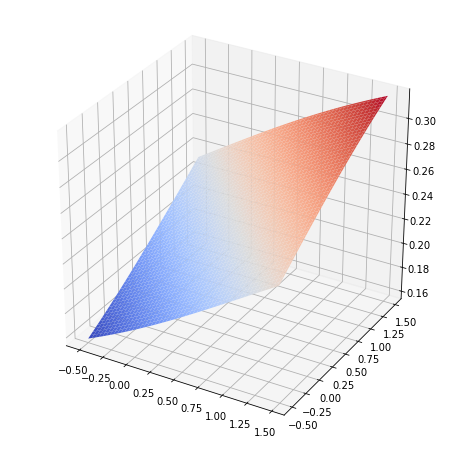

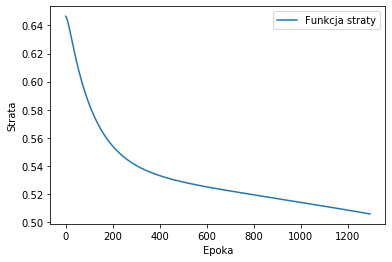

In [180]:
clf = MLPClassifier(activation='logistic', hidden_layer_sizes=(2), solver='sgd', alpha=1e-5, random_state=1, 
                    max_iter=20000, n_iter_no_change=1000)
clf.fit(X, y)

printResults(clf, "xor_2_logistic")

In [81]:
## 9.4 Obserwacja zjawiska przeuczenia na przykładzie zbioru PIMA
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix
from warnings import filterwarnings
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

filterwarnings('ignore')


def drawAccuracy(_clf, name):
#     f = plt.figure()
    plt.plot(_clf.score_curve_, label="Funkcja straty")
    plt.xlabel("Epoka")
    plt.ylabel("Strata")
    plt.legend()
    plt.show()
#     f.savefig('plots/loss_' + name + '.pdf', bbox_inches="tight"

In [115]:
clf = MLPClassifier(activation='logistic', hidden_layer_sizes=(4), solver='sgd', alpha=1e-2, random_state=1, 
                    max_iter=1, warm_start=True, n_iter_no_change=20000)

pima = pd.read_csv('datasets/pima.csv')

train,test=train_test_split(pima,test_size=0.1,random_state=0,stratify=pima['Class'])

X_train=train[train.columns[:8]]
X_test=test[test.columns[:8]]
y_train=train['Class']
y_test=test['Class']

scaler = StandardScaler()  
scaler.fit(X_train) #naucz się parametrów normalizacji tylko na uczącym
X_train = scaler.transform(X_train) #normalizacja uczącego
X_test = scaler.transform(X_test)

# print(X_test)

licz=[] #gromadzimy na potrzeby wykresu te trzy parametry
accu_test=[]
accu_train=[]

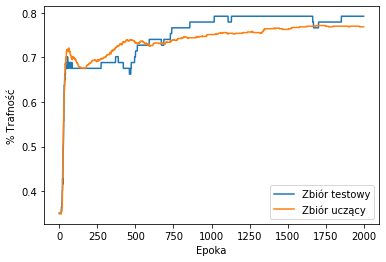

In [116]:
for i in range(2000):
    clf.fit(X_train, y_train)
    licz.append(i)
    accu_test.append(clf.score(X_test,y_test))
    accu_train.append(clf.score(X_train,y_train))
#     if i%500==0: #wyświetlaj postęp obliczeń, co 500-ta epoka
#         print("iter",i, clf.score(X_test,y_test), clf.score(X_train,y_train))
f = plt.figure()
plt.plot(accu_test, label="Zbiór testowy")
plt.plot(accu_train, label="Zbiór uczący")
plt.xlabel("Epoka")
plt.ylabel("% Trafność") # suma kwadratów
plt.legend()
plt.show()
f.savefig('plots/przeuczenie.pdf', bbox_inches="tight")

In [86]:
clf.score(X_test, y_test)

0.8181818181818182

In [87]:
clf.score(X_train, y_train)

0.7742402315484804

In [88]:
y_predicted = clf.predict(X_test)
confusion_matrix(y_test, y_predicted)

array([[45,  5],
       [ 9, 18]])

In [89]:
y_predicted = clf.predict(X_train)
confusion_matrix(y_train, y_predicted)

array([[390,  60],
       [ 96, 145]])

layer weight matrix shapes: [(8, 4), (4, 1)]
detected layer sizes: [8, 4, 1]


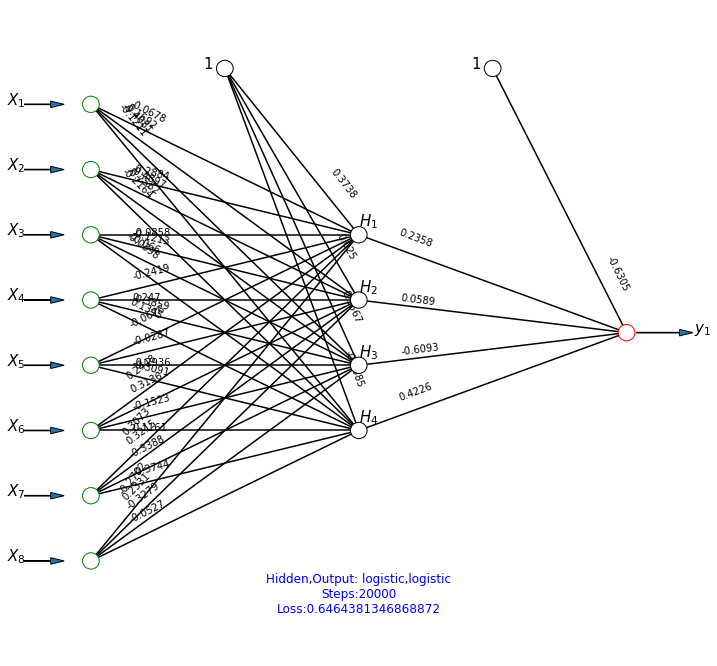

In [27]:
draw_nn(clf)

In [117]:
## 9.5 Dobór liczby neuronów w warstwie ukrytej na przykładzie zbioru IRIS.

In [125]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target
X = StandardScaler().fit_transform(X) #ważne jeśli używamy NN!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) 

scaler = StandardScaler()  
scaler.fit(X_train) #naucz się parametrów normalizacji tylko na uczącym
X_train = scaler.transform(X_train) #normalizacja uczącego
X_test = scaler.transform(X_test)

for i in range(2,11):
    clf = MLPClassifier(hidden_layer_sizes=(i), random_state=1, max_iter=10000)
    clf.fit(X_train, y_train)
    print('\n', i)
    print(clf.score(X_train, y_train))
    print(clf.score(X_test, y_test))


 2
0.9777777777777777
1.0

 3
0.9703703703703703
0.9333333333333333

 4
0.9703703703703703
1.0

 5
0.9703703703703703
1.0

 6
0.9555555555555556
0.9333333333333333

 7
0.9555555555555556
0.9333333333333333

 8
0.9777777777777777
1.0

 9
0.9629629629629629
1.0

 10
0.9555555555555556
0.9333333333333333
